<br>

<b><font size=22>Predictive methods</font></b>
# (Homework - Midterm)

**<font color = red>NGUYEN Thi Huong</font>**

**<font color = red>MASTER 2 EBDS</font>**

# Linear algebra, optimization and linear regression
The purpose of this session is to learn how to handle numpy and its features in Python. 

The first part proposes some exercises to manipulate basic functions from numpy. Do not hesitate to visit the following
page: https://numpy.org/doc/.

The second part will focus on some monovariable optimization methods. The goal will be to implement three
well-known methods (golden-section search, parabolic interpolation and Newton’s method). Algorithms in
pseudo-code are provided.

Finally we will work on the Boston’s housing dataset: the goal is to predict the median value of houses’
prices in different suburbs of Boston given different features of the districts (criminality, industrialization,
etc. . . ). 

You will use numpy to implement your own version of the linear regression (we call that “coding from
scratch”). 

For the parameter estimation, you will use either the function minimize from the package scipy
or your own implementation of the gradient descent algorithm (the latter is recommended, even if minimize
is a very interesting function). 

Check the online help !

 Exercise: K-means from scratch

In this exercise, you will code an algorithm from scratch to perform K-means clustering.

## 1. Data generation process:

First generate a “toy example”, a 2-dimensional dataset (only two features
x1 and x2) in order to test your implementation. 

For example, by setting K = 4, you could define a simulation model specific for each cluster, as follows:

* Cluster 1: x1 ∼ N (1, σ) and x2 ∼ N (1, σ)
* Cluster 2: x1 ∼ N (1, σ) and x2 ∼ N (−1, σ)
* Cluster 3: x1 ∼ N (−1, σ) and x2 ∼ N (−1, σ)
* Cluster 4: x1 ∼ N (−1, σ) and x2 ∼ N (1, σ)

## 2. Effect of parameter σ on the resulting clusters

According to the previous data simulation model, setting σ = 0.1, generate K = 4 clusters, each cluster
should contain 25 observations. Draw the corresponding scatterplot, using a different color for each
cluster. Draw the same scatterplot for different values of σ (σ = 0.2, 0.3, 0.4, 0.5, ...). Explain the effect
of parameter σ on the resulting clusters.

For 2 question, I will combine these question into a bloc code.

In [560]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


To create a cluster with high dimension(in this case 2D array)from Normal distribution, we can use ``np.random.normal`` 
or ``np.random.distribution`` (may be better in this case)

In [561]:
def data_generation(obs, **params):
    distribution = params.get("Distribution", "normal") 
    mu = params.get("mean", 1)
    sigma = params.get("standard_deviation", 0.1)

    df = pd.DataFrame(columns= ["x1", "x2", "cluster"])
    np.random.seed(123)

    for nb in range(len(mu)):   #for each column in dataframe
        globals()["x" + str(nb + 1)] = np.array([]) #initalize 2 array x1 and x2
        for i, mean in enumerate(mu[nb]): #for each mean in a column
            #append new array to initial array x1 and x2
            globals()["cluster_" + str(nb + 1) + str(i + 1)] = getattr(np.random, distribution)(mean, sigma, obs) #cluster_01 = np.random.distribution(1, 5, obs)
            globals()["x" + str(nb + 1)] = np.concatenate((globals()["x" + str(nb + 1)], globals()["cluster_" + str(nb + 1) + str(i + 1)]), axis = None)
  
    df = pd.concat([df, pd.DataFrame({"x1": x1, "x2": x2, })], ignore_index= True)   
    for i in range(0, obs * len(mu[0]), obs):
        df.loc[(df.index >= i) & (df.index < i + obs), 'cluster'] = "Cluster" + str(i/obs + 1)
    return  df

In [1229]:
#test function 2
def data_generation(obs, **params):
    distribution = params.get("Distribution", "normal") 
    mu = params.get("mean", 1)
    sigma = params.get("standard_deviation", 0.1)

    df = pd.DataFrame(columns= ["x1", "x2", "cluster"])
    np.random.seed(123)

    for nb in range(len(mu)):   #for each column in dataframe
        globals()["x" + str(nb + 1)] = np.array([]) #initalize 2 array x1 and x2
        for i, mean in enumerate(mu[nb]): #for each mean in a column
            #append new array to initial array x1 and x2
            globals()["cluster_" + str(nb + 1) + str(i + 1)] = getattr(np.random, distribution)(mean, sigma, obs) #cluster_01 = np.random.distribution(1, 5, obs)
            globals()["x" + str(nb + 1)] = np.concatenate((globals()["x" + str(nb + 1)], globals()["cluster_" + str(nb + 1) + str(i + 1)]), axis = None)
  
    df = pd.concat([df, pd.DataFrame({"x1": x1, "x2": x2, })], ignore_index= True)   
    for i in range(0, obs * len(mu[0]), obs):
        df.loc[(df.index >= i) & (df.index < i + obs), 'cluster'] = i/obs + 1
    return  df

In [1362]:
df = data_generation(25, mean = ([1, 1, -1, -1], [1, -1, -1, 1]))

In [1231]:
print(df.to_string())

          x1        x2 cluster
0   0.891437  1.064205     1.0
1   1.099735  0.802211     1.0
2   1.028298  1.071226     1.0
3   0.849371   1.25983     1.0
4    0.94214  0.997537     1.0
5   1.165144  1.003414     1.0
6   0.757332  1.017955     1.0
7   0.957109  0.813802     1.0
8   1.126594  1.042615     1.0
9   0.913326  0.839459     1.0
10  0.932111  0.957232     1.0
11  0.990529  1.124287     1.0
12  1.149139  0.926478     1.0
13   0.93611  1.050125     1.0
14  0.955602  1.101274     1.0
15  0.956565  1.027874     1.0
16  1.220593  0.862905     1.0
17  1.218679  0.966752     1.0
18  1.100405  1.195941     1.0
19  1.038619  0.797495     1.0
20  1.073737  0.972421     1.0
21  1.149073  0.944789     1.0
22  0.906417  1.012075     1.0
23  1.117583  1.074822     1.0
24  0.874612  1.160869     1.0
25  0.936225 -1.027023     2.0
26  1.090711 -0.918766     2.0
27  0.857132 -0.950026     2.0
28  0.985993 -0.952565     2.0
29  0.913825 -1.056392     2.0
30  0.974438 -1.099732     2.0
31  0.72

In [1240]:
df.dtypes

x1         float64
x2         float64
cluster     object
dtype: object

In [1363]:
df["x1"] = df["x1"].astype(float)
df["x2"] = df["x2"].astype(float)

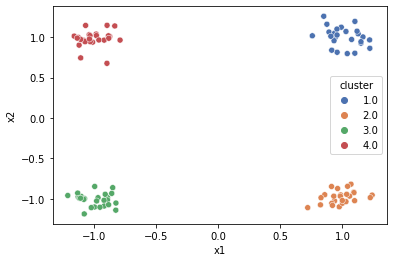

In [1233]:
import seaborn as sns
sns.scatterplot(data = df, x = "x1", y = "x2", hue= 'cluster' , palette="deep")
plt.show()

In [1234]:
# colors = {1:'red', 2:'green', 3:'blue', 4:'salmon'}
# plt.scatter(df.x1, df.x2, c= df['cluster'].map(colors) )

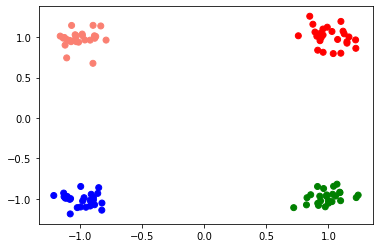

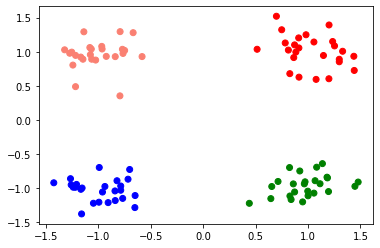

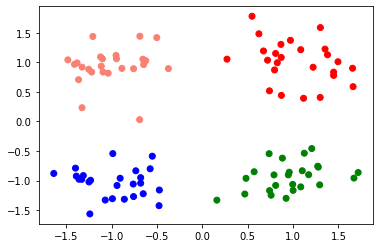

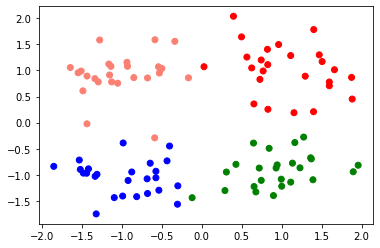

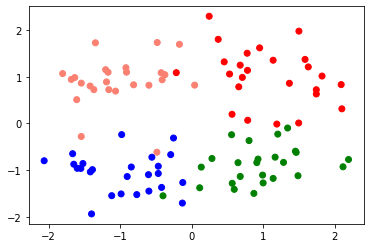

In [1209]:
for i in range(1, 6):
    globals()["df" + str(i)]  = data_generation(25, mean = ([1, 1, -1, -1], [1, -1, -1, 1]), standard_deviation = i/10)
    plt.scatter(globals()["df" + str(i)].x1, globals()["df" + str(i)].x2, c= globals()["df" + str(i)]['cluster'].map(colors) )
    plt.show()

## 3. K cluster centroids
The training dataset should be a matrix X ∈ R n×2 (n = 25K observations and 2 features). Propose a way to initialize K-means, in other words: randomly pick K cluster centroids µ1, µ2, ..., µK.

### Random pick K clusters centroids out of sample 

In [1210]:
#np.random.seed(123)
df_centroids = pd.DataFrame(columns= ["x1", "x2"])
cov = [[0.1, 0], [0, 0.1]]
mean = [np.random.uniform(-1, 1), np.random.uniform(-1, 1)]
x1, x2 = np.random.multivariate_normal(mean, cov, 4).T
df_centroids = pd.concat([df_centroids, pd.DataFrame({"x1": x1, "x2": x2, })], ignore_index= True)  

### Random pick K clusters centroids in our sample 

In [1211]:
#df_centroids = pd.DataFrame(columns= ["x1", "x2"])
np.random.seed(123)
centroids = []
for k in range(4):
    centroid = df[["x1", "x2"]].apply(lambda x: float(x.sample()))
    centroids.append(centroid)
df_centroids = pd.concat(centroids , axis = 1).T  

In [1212]:
def intialization_centroids(K, data):
    np.random.seed(123)
    centroids = []
    for k in range(K):
        centroid = data[["x1", "x2"]].apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    df_centroids = pd.concat(centroids , axis = 1).T 
    return df_centroids 

In [1213]:
df_centroids = intialization_centroids(4, df)

In [1214]:
df_centroids


,x1,x2
0,1.126594,0.964518
1,0.990529,1.050125
2,0.906417,-1.053067
3,0.827233,-1.007512


## 4. Assign to closest cluster centroid

Implement the cluster assignment step: for each observation x
(i), assign this observations to its closest
cluster centroid, in other words compute for all i ∈ {1, ..., n}:


In [1215]:
def distance(xA, yA, xB, yB): 
    distance = ((xA - xB) ** 2 + (yA - yB) ** 2) ** 0.5
    return distance

In [1216]:
##test 
# for i in range(4):
#    globals()["df"][i + 1]  = distance(df.iloc[:, 0], df.iloc[:, 1],df_centroids.iloc[:, 0][i], df_centroids.iloc[:, 1][i])
# df["closest_centroid"] = df.iloc[:, 3:7].idxmin(axis = 1)  

In [1217]:
#def cluster_centroid()
def cluster_centroid(data, data_centroids):
    df = data
    d = f'{df=}'.split('=')[0]
    for i in range(4):        
        globals()[d][i + 1] = distance(data.iloc[:, 0], data.iloc[:, 1],data_centroids.iloc[:, 0][i], data_centroids.iloc[:, 1][i])
    data["closest_centroid"] = data.iloc[:, 3:7].idxmin(axis = 1) 

In [1218]:
cluster_centroid(df, df_centroids)

In [1219]:
print(df.to_string())

          x1        x2 cluster         1         2         3         4  closest_centroid
0   0.891437  1.064205     1.0  0.255414  0.100088  2.117326  2.072712                 2
1   1.099735  0.802211     1.0  0.164514  0.270900  1.865323  1.830124                 1
2   1.028298  1.071226     1.0  0.145082  0.043264  2.127788  2.088440                 2
3   0.849371  1.259830     1.0  0.405046  0.252789  2.313601  2.267451                 2
4   0.942140  0.997537     1.0  0.187386  0.071463  2.050916  2.008339                 2
5   1.165144  1.003414     1.0  0.054764  0.180754  2.072693  2.039119                 1
6   0.757332  1.017955     1.0  0.373108  0.235406  2.076381  2.026673                 2
7   0.957109  0.813802     1.0  0.226804  0.238674  1.867558  1.825939                 1
8   1.126594  1.042615     1.0  0.078097  0.136272  2.107217  2.071868                 1
9   0.913326  0.839459     1.0  0.247230  0.224367  1.892539  1.848977                 2
10  0.932111  0.95723

## 5. Compute the average (mean) of these observations

Implement the update cluster centroid step: for each cluster k, consider the set of obervations assigned
to cluster k, and compute the average (mean) of these observations, in other words, compute for all
k ∈ {1, ..., K}:

In [1227]:
# df_centroids_new = df.groupby(["closest_centroid"])[["x1","x2"]].mean().reset_index()
# df_centroids_new


In [1221]:
def new_centroids(data):
    df_centroids_new = data.groupby(["closest_centroid"]).mean().reset_index().iloc[:, 1:3]
    return df_centroids_new
    
new_centroids(df)

,x1,x2
0,1.119637,0.927973
1,-0.308103,1.010144
2,1.028835,-0.976051
3,-0.686854,-1.009256


## 6. Draw again the corresponding scatterplot with the current cluster centroids 
Draw again the corresponding scatterplot, using a different color for each point in a cluster, and add
K points representing the current cluster centroids (you should use a different symbol to distinguish
between points and cluster centroids).

### methode 1

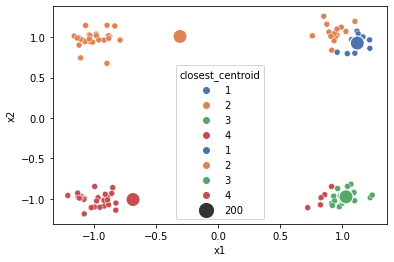

In [1222]:
df = df.sort_values('closest_centroid', ascending = True, ignore_index= True)
sns.scatterplot(data = df, x = "x1", y = "x2", hue= 'closest_centroid' , palette="deep")
sns.scatterplot(data = df_centroids_new, x = "x1", y = "x2", hue= 'closest_centroid',size = 200, sizes= (200,200) , palette="deep")
plt.show()


### Method 2

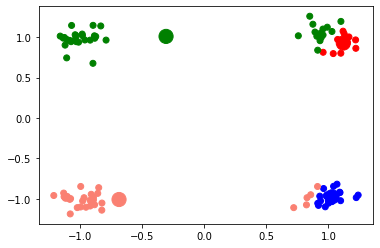

In [1223]:

colors = {1:'red', 2:'green', 3:'blue', 4:'salmon'}
plt.scatter(df.x1, df.x2, c= df['closest_centroid'].map(colors) )
plt.scatter(df_centroids_new.x1, df_centroids_new.x2, marker = 'o', s = 200, c = df_centroids_new['closest_centroid'].map(colors) )
plt.show()

## 7. Repeat steps 4 to 6
Use a loop in order to repeat steps 4 to 6. The number of iterations should be large enough for the
algorithm to have time to converge. Note that a parameter ϵ (a small value) can be introduced here to
stop the algorithm automatically, we can force the algorithm to stop

In [1224]:
iteration = 1
max_iteration = 100
#colors = {'centroid1':'red', 'centroid2':'green', 'centroid3':'blue', 'centroid4':'salmon'}
colors = {1:'red', 2:'green', 3:'blue', 4:'salmon'}
colors_centroids = {0:'red', 1:'green', 2:'blue', 3:'salmon'}
#df_centroids = intialization_centroids(4, df)
df_old_centroids = pd.DataFrame()

By using plt.scatter, Im not prefer because I need to set up difference color if K is changed, therefore I prefer using sns plot 

In [1226]:
# while (iteration < max_iteration):
#     df_old_centroids = df_centroids
#     cluster_centroid(df, df_old_centroids)
#     df_centroids = new_centroids(df)
#     plt.scatter(df.x1, df.x2, c= df['closest_centroid'].map(colors) )
#     plt.scatter(df_centroids.x1, df_centroids.x2, marker = 'o', s = 200, c= df_centroids.index.map(colors_centroids) )
#     plt.show()
#     if np.all(abs(distance(df_centroids.iloc[:, 0], df_centroids.iloc[:, 1], df_old_centroids.iloc[:, 0], df_old_centroids.iloc[:, 1])) < 0.01):
#         break
#     iteration += 1

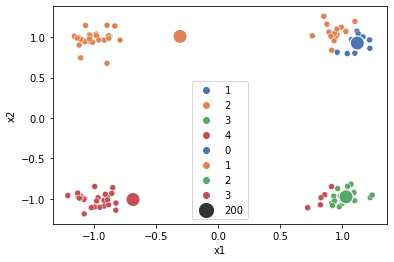

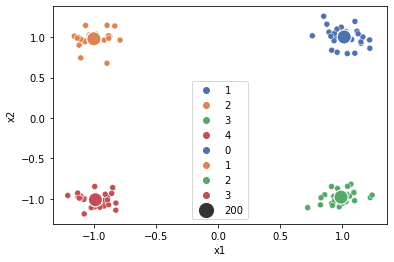

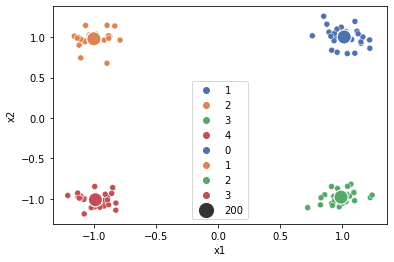

In [1225]:
while (iteration < max_iteration):
    df_old_centroids = df_centroids
    cluster_centroid(df, df_old_centroids)
    df_centroids = new_centroids(df)
    sns.scatterplot(data = df, x = "x1", y = "x2", hue= 'closest_centroid' , palette="deep")
    sns.scatterplot(data = df_centroids, x = "x1", y = "x2", hue = df_centroids.index, size = 200, sizes= (200,200) , palette="deep")
    plt.show()
    if np.all(abs(distance(df_centroids.iloc[:, 0], df_centroids.iloc[:, 1], df_old_centroids.iloc[:, 0], df_old_centroids.iloc[:, 1])) < 0.01):
        break
    iteration += 1

## 8. Kmeans function
Implement the whole algorithm in a same Python (or R) funtion, named Kmeans, that takes the matrix
X as input, and returns as outputs: the clusters assigned to the observations c
(1), c(2), ..., c(n) and the
cluster centroids µ1, µ2, ..., µK. Ideally, the function should plot the final scatterplot, with a different
color for each cluster, and the corresponding cluster centroids.

In [1384]:
def Kmeans(data, K):
    
    iteration = 1
    max_iteration = 100
    #colors = {'centroid1':'red', 'centroid2':'green', 'centroid3':'blue', 'centroid4':'salmon'}
    #colors_centroids = {0:'red', 1:'green', 2:'blue', 3:'salmon'}
    df_old_centroids = pd.DataFrame()

    
    #set up centroids
    #df_centroids = intialization_centroids(4, df)
    centroids = []
    for k in range(K):
        centroid = data[["x1", "x2"]].apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    df_centroids = pd.concat(centroids , axis = 1).T 


    while (iteration < max_iteration):
        df_old_centroids = df_centroids

        #cluster_centroid(data, df_old_centroids)
        # Calculate the distance between old centroids and observations

        # for i in range(K):        
        #     data[str(i + 1)] = distance(data.iloc[:, 0], data.iloc[:, 1],df_old_centroids.iloc[:, 0][i], df_old_centroids.iloc[:, 1][i])
        # data["closest_centroid"] = data.iloc[:, data.shape[1] - K : data.shape[1]].idxmin(axis = 1) 

        for i in range(K):        
            data.insert(data.shape[1], str(i + 1), distance(data.iloc[:, 0], data.iloc[:, 1],df_old_centroids.iloc[:, 0][i], df_old_centroids.iloc[:, 1][i]), True)
        data["closest_centroid"] = data.iloc[:, data.shape[1] - K : data.shape[1]].idxmin(axis = 1) 
        data.drop(data.iloc[:, data.shape[1] - K - 1 : data.shape[1] - 1], inplace=True, axis=1)

        #df_centroids = new_centroids(df)
        #def new_centroids(data):
        df_centroids = data.groupby(["closest_centroid"]).mean().reset_index().iloc[:, 1: (df_old_centroids.shape[1] + 1)]
        

        #plot resultat 
        data = data.sort_values('closest_centroid', ascending = True, ignore_index= True)
        sns.scatterplot(data = data, x = "x1", y = "x2", hue= 'closest_centroid' , palette="deep")
        sns.scatterplot(data = df_centroids, x = "x1", y = "x2", hue = df_centroids.index ,size = 200, sizes= (200,200) , palette="deep")
        plt.show()
        if np.all(abs(distance(df_centroids.iloc[:, 0], df_centroids.iloc[:, 1], df_old_centroids.iloc[:, 0], df_old_centroids.iloc[:, 1])) < 0.01):
            break
        iteration += 1

In [1398]:
df_centroids

,x1,x2
0,1.014010,1.003504
1,-1.002010,0.980629
2,0.988644,-0.979671
3,-0.989800,-1.012276


In [1397]:
df_old_centroids

,x1,x2
0,1.014010,1.003504
1,-1.002010,0.980629
2,0.988644,-0.979671
3,-0.989800,-1.012276


In [1399]:
for i in range(4):        
    df[str(i + 1)] = distance(df.iloc[:, 0], df.iloc[:, 1],df_old_centroids.iloc[:, 0][i], df_old_centroids.iloc[:, 1][i])
df["closest_centroid"] = df.iloc[:, df.shape[1] - 4 : df.shape[1]].idxmin(axis = 1) 

In [1403]:
for i in range(4):        
    df.insert(df.shape[1], str(i + 1), distance(df.iloc[:, 0], df.iloc[:, 1],df_old_centroids.iloc[:, 0][i], df_old_centroids.iloc[:, 1][i]), True)
df.insert(df.shape[1], "closest_centroid",df.iloc[:, df.shape[1] - 4 : df.shape[1]].idxmin(axis = 1) )

ValueError: cannot insert closest_centroid, already exists

In [1404]:
df["closest_centroid"] = df.iloc[:, df.shape[1] - 4 : df.shape[1]].idxmin(axis = 1) 

In [1401]:
df.drop(df.iloc[:, 4 :  8], inplace=True, axis=1)

In [1405]:
df

,x1,x2,cluster,closest_centroid,1,2,3,4
0,0.891437,1.064205,1.0,1,0.136781,1.895291,2.046187,2.801933
1,1.099735,0.802211,1.0,1,0.218786,2.109304,1.785342,2.767403
2,1.028298,1.071226,1.0,1,0.069213,2.032328,2.051281,2.900639
3,0.849371,1.259830,1.0,1,0.304647,1.872315,2.243828,2.923186
4,0.942140,0.997537,1.0,1,0.072118,1.944224,1.977755,2.787785
...,...,...,...,...,...,...,...,...
95,-0.896889,0.676894,4.0,2,1.938610,0.321411,2.509869,1.691724
96,-1.108457,0.973071,4.0,2,2.122685,0.106715,2.865490,1.988889
97,-1.136347,0.988915,4.0,2,2.150407,0.134592,2.896708,2.006550
98,-0.962060,0.965874,4.0,2,1.976428,0.042588,2.755066,1.978345


In [1320]:
df_centroids

,x1,x2
0,1.014010,1.003504
1,-1.002010,0.980629
2,0.988644,-0.979671
3,-0.989800,-1.012276


In [1389]:
df

,x1,x2,cluster,closest_centroid
0,0.891437,1.064205,1.0,4
1,1.099735,0.802211,1.0,4
2,1.028298,1.071226,1.0,4
3,0.849371,1.259830,1.0,4
4,0.942140,0.997537,1.0,4
...,...,...,...,...
95,-0.896889,0.676894,4.0,2
96,-1.108457,0.973071,4.0,1
97,-1.136347,0.988915,4.0,1
98,-0.962060,0.965874,4.0,1


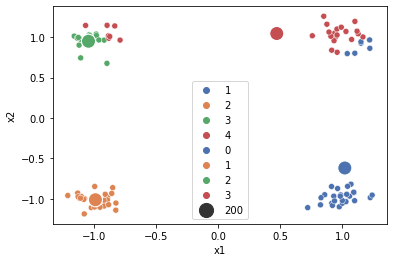

KeyError: 'closest_centroid'

In [1394]:
Kmeans(df, 4)

## 9. Implement “repeated” K-means to reduce the risk of finding local optima
Modify your function and implement “repeated” K-means, in order to reduce the risk of finding local
optima. The final function must be applied to the simulated data (see question 1), with different values
of σ. Propose a way to compute the quality of the obtained partition: is there a way to compute a
misclassification error rate in this case ?

## 10. Generalize your function for a matrix 
Generalize your function for a matrix X ∈ R n×p, where p > 2.

## 11. Test your function on a real dataset.
Many datasets can be easily loaded on Python with the library
scikit-learn: https://scikit-learn.org/stable/datasets/index.html. For R users, have a look on the 2 package datasets. Here again, propose a way to compute the quality of the obtained partition: is there a way to compute a misclassification error rate in this case ?